In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [6]:
n = len(zp)
b1 = (n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks))/(n * np.sum(zp**2) - np.sum(zp)**2)
b1

2.6205388824027653

In [7]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b1

2.620538882402765

In [8]:
b0 = np.mean(ks) - b1 * np.mean(zp)
b0

444.1773573243596

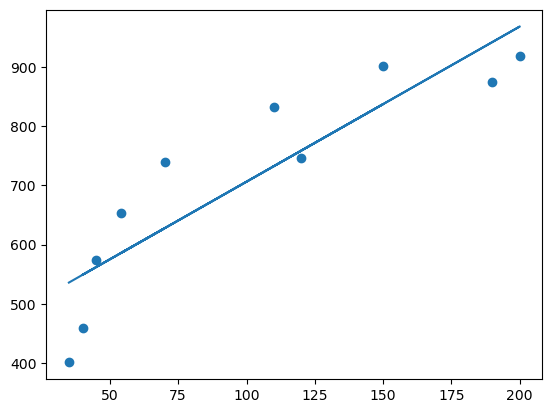

In [11]:
plt.scatter(zp,ks)
plt.plot(zp, b0 + b1 * zp)
plt.show()

In [12]:
mse = ((ks - (b0 + b1 * zp))**2).sum() / n
mse

6470.414201176658

Вариант 2, Матричный метод расчета коэффициентов линейной регрессии.(без interсept)

In [29]:
zp = zp.reshape(10,1)
ks = ks.reshape(10,1)
zp, ks

(array([[ 35],
        [ 45],
        [190],
        [200],
        [ 40],
        [ 70],
        [ 54],
        [150],
        [120],
        [110]]),
 array([[401],
        [574],
        [874],
        [919],
        [459],
        [739],
        [653],
        [902],
        [746],
        [832]]))

In [30]:
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)), zp.T @ ks)
B

array([[5.88982042]])

In [83]:
mse = np.sum(((5.88982042 * zp) - ks) ** 2) / n
mse

56516.85841571943

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [64]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [65]:
alpha = 1e-6
B1 = 0.1

In [76]:
def mse(B1, y = ks, x = zp, n = 10):
    return np.sum((B1 * x - y) ** 2) / n

In [81]:
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * zp - ks) * zp)
    if i % 100 == 0:
        print('iteration: {i}, B1 = {B1}, mse: {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

iteration: 0, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 100, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 200, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 300, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 400, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 500, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 600, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 700, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 800, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 900, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 1000, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 1100, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 1200, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 1300, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 1400, B1 = 5.889820420132673, mse: 56516.85841571943
iteration: 1500, B1 = 5.889820420132673, mse: 56516.